In [1]:
import pandas as pd
import json
import gzip
import os
from tqdm.auto import tqdm

In [2]:
base_dir = os.path.expanduser('~/Documents/lvml/datasets')
input_path = f'{base_dir}/goodreads_interactions_comics_graphic.json.gz'

entries = []
with gzip.open(input_path,'r') as f:
    n_lines_total = 0
    n_lines_valid = 0
    for line in tqdm(f):
        entry = json.loads(line)
        if entry['rating'] > 0:
            entries.append(entry)
            n_lines_valid += 1
        n_lines_total += 1

print(f'Total: {n_lines_total} interactions')
print(f'Rated: {n_lines_valid} interactions ({n_lines_valid/n_lines_total:.2%})')


0it [00:00, ?it/s]

Total: 7347630 interactions
Rated: 4514094 interactions (61.44%)


In [3]:
df = pd.DataFrame(entries)
df.head()

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,8842281e1d1347389f2ab93d60773d4d,24815,281e647d84a8581c9b2b3957156f58fb,True,5,,Thu Apr 17 23:42:49 -0700 2008,Thu Apr 17 23:42:49 -0700 2008,,
1,8842281e1d1347389f2ab93d60773d4d,24818,96d10c7701527f0353d5b016fc79200d,True,5,,Thu Apr 17 23:42:42 -0700 2008,Thu Apr 17 23:42:42 -0700 2008,,
2,8842281e1d1347389f2ab93d60773d4d,59715,d1b70d94aa49bb0e3ff855805ed5c172,True,5,,Thu Apr 17 23:42:40 -0700 2008,Thu Apr 17 23:42:40 -0700 2008,,
3,8842281e1d1347389f2ab93d60773d4d,24816,66034d49dac62288c5e7ed4ebf7c8c3b,True,5,,Thu Apr 17 23:42:38 -0700 2008,Thu Apr 17 23:42:38 -0700 2008,,
4,7504b2aee1ecb5b2872d3da381c6c91e,13284343,eec681b896b88ab6858d3999e7c6b825,True,4,,Thu Jun 07 11:38:13 -0700 2012,Thu Jun 07 11:38:18 -0700 2012,,


In [4]:
n_ratings_threshold = 20
users_wl = (
    df['user_id']
    .value_counts()
    .where(lambda x: x>=n_ratings_threshold)
    .dropna()
    .pipe(lambda s: set(s.index))
)
print(f'{len(users_wl)} distinct users with {n_ratings_threshold} ratings or more')

41932 distinct users with 20 ratings or more


In [5]:
# Assert that each user-book pair is unique
assert df.groupby(['user_id','book_id']).ngroups==len(df)

In [6]:
whitelisted_df = (
    df
    [df['user_id'].isin(users_wl)]
    [['user_id','book_id','rating']]
)
print(f'{len(whitelisted_df)} rows in user-whitelisted df')
whitelisted_df.head()

3679076 rows in user-whitelisted df


,user_id,book_id,rating
20,06316bec7a49286f1f98d5acce24f923,575753,4
21,06316bec7a49286f1f98d5acce24f923,47694,4
22,06316bec7a49286f1f98d5acce24f923,47700,3
23,06316bec7a49286f1f98d5acce24f923,47720,4
24,06316bec7a49286f1f98d5acce24f923,25104,5


In [10]:
whitelisted_df.nunique()

user_id    41932
book_id    87565
rating         5
dtype: int64

<AxesSubplot:ylabel='Frequency'>

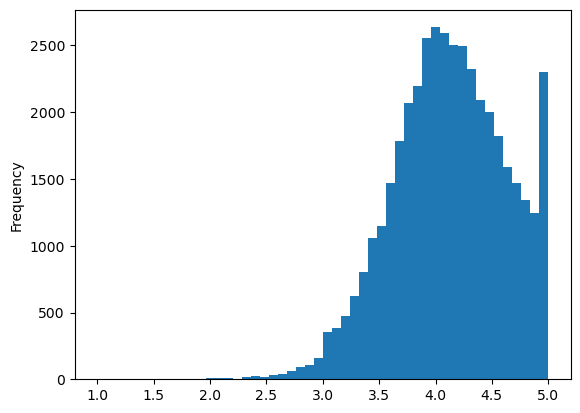

In [7]:
whitelisted_df.groupby('user_id')['rating'].mean().plot.hist(bins=50)

In [8]:
output_path = f'{base_dir}/goodreads_interactions_comics_graphic.csv'
whitelisted_df.to_csv(output_path, index=False)
print('Done!')

Done!
